<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/04_%EA%B0%9C%2C%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EB%A7%81(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


### MLP
이미지 위치에 민감 → 모든 픽셀을 연산
숫자 인식을 하려면 크기, 위치를 비슷하게 해야 가능
2. 2차원 이미지를 1차원화하면서(Flatten 사용) 위치 관계에 대한 정보도 잃었음

### CNN(Convolutional Neural NetWork)
- 특징 부분을 추출
- MLP 기반으로 만들어진 모델

### 목표
-MLP, CNN 모델을 활용해서 이미지 분류 모델링 실습
  -> 두 모델 성능 비교
- 딥러닝 성능을 올릴 수 있는 방법도 배워보자

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# npz 파일 불러오기
data = np.load('./data/np_cat_vs_dogs.npz')

In [5]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [6]:
# 모양 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 224, 224, 3), (1000, 224, 224, 3), (2000,), (1000,))

### MLP 모델링 수행
1. 신경망 구조 설계
- Flatten 넣어주기
- 중간층 : 3개 layer, units = [256, 128, 64], 활성화함수 = 'relu'
2. 학습 방법 설정
- adam, accuracy
- 조기 학습 중단 : val set 5회
3. 학습
- epochs = 40, validation_split = 30%
4. 시각화 train_acc, val_acc

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 469ms/step - accuracy: 0.5735 - loss: 4805.6445 - val_accuracy: 0.4950 - val_loss: 184.1253
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 513ms/step - accuracy: 0.6277 - loss: 795.4930 - val_accuracy: 0.0000e+00 - val_loss: 2110.6755
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 468ms/step - accuracy: 0.6040 - loss: 977.0868 - val_accuracy: 0.1217 - val_loss: 474.6154
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 534ms/step - accuracy: 0.6305 - loss: 244.1420 - val_accuracy: 0.3750 - val_loss: 143.1017
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 517ms/step - accuracy: 0.6920 - loss: 78.2477 - val_accuracy: 0.0150 - val_loss: 487.9055
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 550ms/step - accuracy: 0.6723 - loss: 125.3725 - val_accuracy: 0.0200 - val_loss: 403.2904


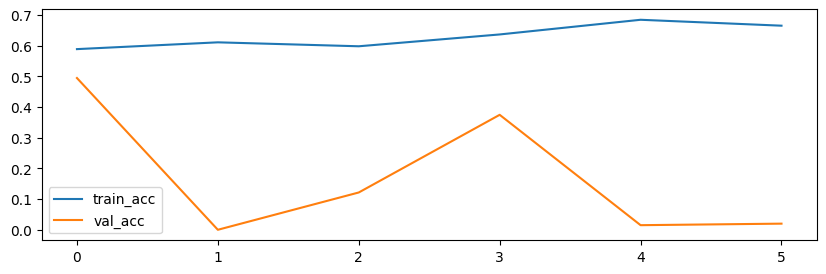

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(InputLayer(shape = X_train[0].shape))

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))

earlyStopping = EarlyStopping(monitor = "val_accuracy", patience = 5)

model.compile(
    optimizer = "Adam",
    metrics = ["accuracy"],
    loss = 'binary_crossentropy'
)

h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 40, callbacks = [earlyStopping])

plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [9]:
# 필요 라이브러리 로딩
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# Conv2D : 특징을 잡아내는 역할을 하는 모듈
# MaxPooling2D : 중요한 정보만 걸러내는 모듈

### CNN(Convolution Neural Network, 합성곱 신경망)
- 이미지나 영상같은 시각 데이터를 처리하는데 특화된 딥러닝 모델
- 사람의 시각시스템을 모방하여 설계

1. 모델 설계
  - 뼈대 생성
  - 특성 추출부(Conv, Pool)
  - 분류부(MLP)
2. 학습 방법 설정
3. 학습
4. 예측 평가
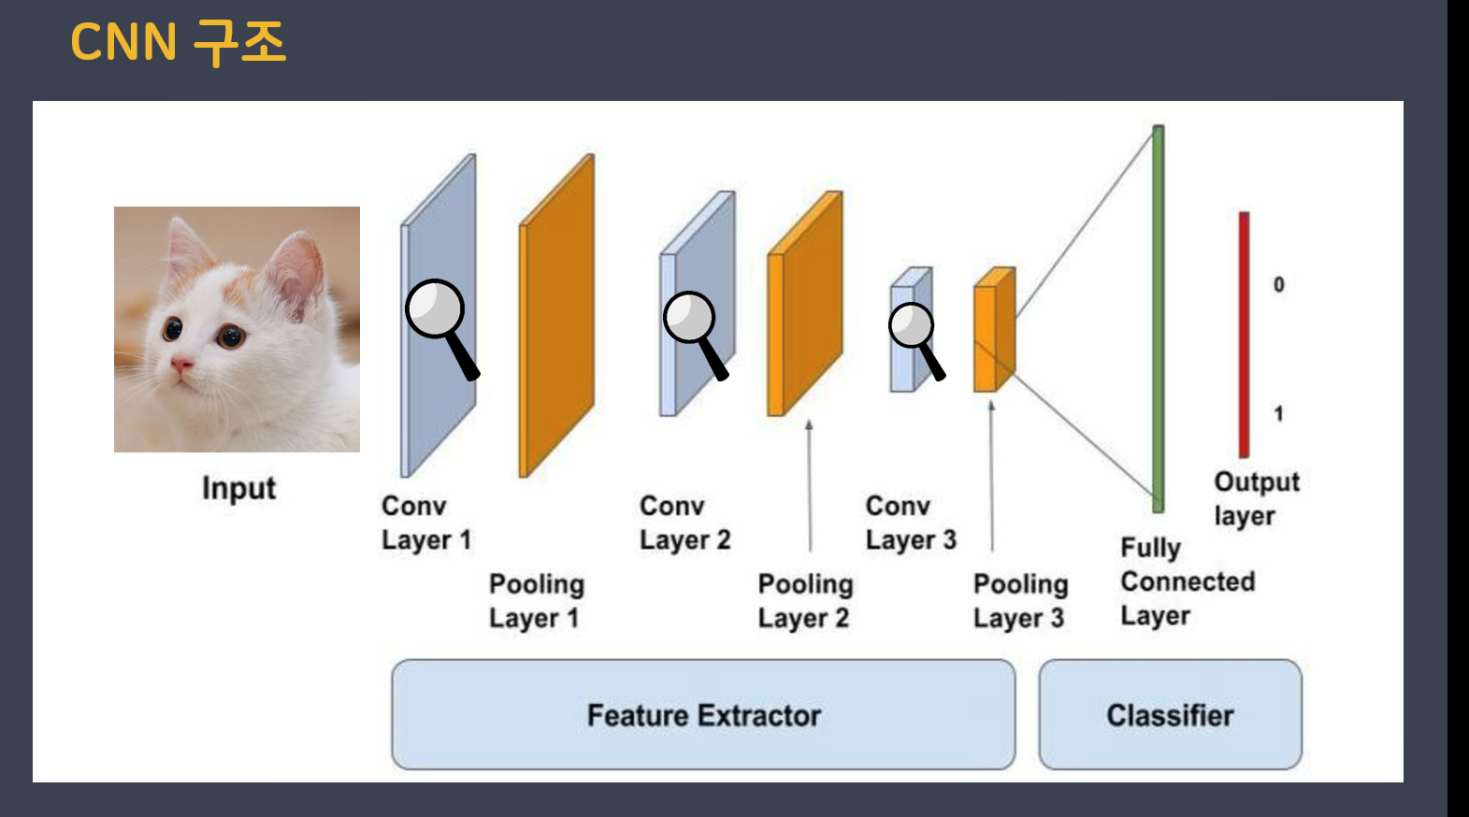

In [10]:
# 1. 설계
# 1-1) 뼈대 설계
cnn_model = Sequential()
# 1-2) 입력층
cnn_model.add(InputLayer(shape = (224, 224, 3)))

# 1-3) 특성 추출부(Feature Extractor)
# 특징 추출 연산
cnn_model.add(
    Conv2D(
        filters = 32,        # 커널(필터)의 개수
        kernel_size = (3, 3), # 커널(필터)의 사이즈
        activation = "relu",
        padding = "same",     # 패딩 : 입출력의 크기를 동일하게 맞추기 위해 가장자리에 숫자(보통 0)를 채워 넣는 기능
                              # same : 이미지 자체가 작거나 혹은 가장자리 정보가 중요할 때
                              # valid : 이미지 자체가 클 때(특징이 많을 때)
        strides = (2, 2)      # 커널의 이동 보폭 : 양 옆, 위 아래로 2픽셀씩 커널을 이동
    )
)
# 이미지의 경계선, 질감 같은 국소적인 특징을 추출 가능

# 압축 및 요약
cnn_model.add(MaxPooling2D(
    pool_size = (2, 2) # 풀링 윈도우 : 보통 2*2, 3*3을 많이 사용
))

# max pooling : 풀링 윈도우에서 최대값만 넘김
# average pooling : 풀링 윈도우의 평균값을 넘김

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = (2, 2)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = (2, 2)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

# 1-4 분류부(MLP)
cnn_model.add(Flatten())

# 중간층
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 64, activation = 'relu'))

# 1-5) 출력
cnn_model.add(Dense(1, activation = "sigmoid"))

In [11]:
# 2. 학습 방법 설정
cnn_model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [13]:
# 3. 학습
cnn_his = cnn_model.fit(
    X_train, y_train,
    validation_split = 0.3,
    epochs = 20,
    batch_size = 64 # 전체 데이터셋을 나누는 크기
    # 전체 데이터셋을 batch_size로 나눠서 모든 구간을 학습 반영 -> 1 epoch
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 511ms/step - accuracy: 0.9911 - loss: 0.0317 - val_accuracy: 0.3617 - val_loss: 4.7934
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 488ms/step - accuracy: 0.9812 - loss: 0.0380 - val_accuracy: 0.5483 - val_loss: 2.3782
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 497ms/step - accuracy: 0.9704 - loss: 0.0692 - val_accuracy: 0.2883 - val_loss: 5.4276
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 546ms/step - accuracy: 0.9808 - loss: 0.0595 - val_accuracy: 0.5250 - val_loss: 2.5624
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 548ms/step - accuracy: 0.9790 - loss: 0.0604 - val_accuracy: 0.4133 - val_loss: 3.6141
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 519ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.3150 - val_loss: 5.1150
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 853ms/step - accuracy: 0.9951 - loss: 0.0184 - val_accuracy: 0.3767 - val_loss: 4.4192
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 639ms/step - accuracy: 0.9977 - loss: 0.0137 - val_accu

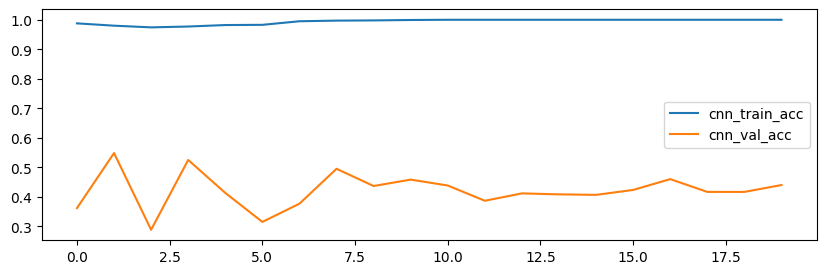

In [14]:
# 4. 시각화
plt.figure(figsize = (10, 3))
plt.plot(cnn_his.history['accuracy'], label = 'cnn_train_acc')
plt.plot(cnn_his.history['val_accuracy'], label = 'cnn_val_acc')
plt.legend()
plt.show()

# MLP 보다는 좀 더 학습이 됌(train 데이터에서 정확도가 좀 올랐음)
#

### 딥러닝 성능을 올려보자
- 이미지 데이터 증강(Data augmentation) : 이미지 회전, 이동, 확대, 축소, 뒤집기 등을 통해서 데이터가 추가된 것처럼 train 데이터의 개수를 늘리는 방법
- Train 데이터에만 증강 적용

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# 증강할 데이터(원본) 경로 할당
train_dir = "./data/cats_and_dogs_filtered/train"
test_dir = "./data/cats_and_dogs_filtered/test"

| 옵션               | 설명                                                       |
|--------------------|------------------------------------------------------------|
| `rescale`          | 입력 이미지의 픽셀 값 재조정(ex.rescale=1.255 -> 모든 픽셀값들에 대해 0~1 사이로 정규화)|
| `rotation_range`   | 이미지의 회전 범위를 설정(ex.rotation_range -> -20~20도 사이에서 무작위로 회전)|
| `width_shift_range`| 이미지의 수평 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 좌우로 무작위로 이동) |
| `height_shift_range`| 이미지의 수직 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 위아래로 무작위로 이동)|
| `shear_range`      | 시계 반대 방향으로 지정된 각도만큼 변형       |
| `zoom_range`       | 이미지의 확대 및 축소 범위를 설정(ex.0.1 -> 0.9배~1.1배 사이에서 무작위로 확대하거나 축소) |
| `horizontal_flip`  | 이미지를 수평 방향으로 뒤집을지 여부를 설정       |
| `fill_mode`        | 이미지를 변형할 때 생기는 빈 공간을 채우는 방식을 설정(ex.nearest -> 가장 가까운 픽셀값을 사용하여 빈공간 채우기) |

In [19]:
# 이미지 증강 도구 세팅
train_gen = ImageDataGenerator(
    rescale = 1./255, # 모든 이미지의 픽셀 값을 0~1 사이로 정규화
    zoom_range = 0.2, # 0.8배~1.2배 사이에서 무작위로 확대, 축소
    horizontal_flip = True
)

test_gen = ImageDataGenerator(rescale = 1./255) # 테스트 데이터는 정규화만 수행

In [20]:
# 이미지 증강
train_generator = train_gen.flow_from_directory(
    train_dir, # 원본 데이터 경로
    target_size = (224, 224), # 원본 데이터 크기
    batch_size = 64,          # 한 번에 학습시킬 이미지의 개수
    class_mode = "binary"     # binary : 이진분류
)

test_generator = test_gen.flow_from_directory(
    test_dir, # 원본 데이터 경로
    target_size = (224, 224), # 원본 데이터 크기
    batch_size = 64,          # 한 번에 학습시킬 이미지의 개수
    class_mode = "binary"     # binary : 이진분류
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Dropout
- 신경망의 노드를 지정한 비율만큼 비활성화
- 학습하는 동안에만 적용
- 모델이 학습 데이터를 너무 외워버리지 않도록(과대적합 방지) 일부 뉴런을 랜덤하게 꺼버리는(비활성화) 기술

In [21]:
from tensorflow.keras.layers import Dropout

In [22]:
# 1. 설계
# 1-1 뼈대
cnn_model2 = Sequential()

# 1-2 입력층
cnn_model2.add(InputLayer(shape = (224, 224, 3)))

# 1-3 특성 추출부

cnn_model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same", strides = (2, 2)))
cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model2.add(Dropout(0.3)) # 학습 시 30%의 노드를 랜덤하게 비활성화 시키겠다

cnn_model2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = (2, 2)))
cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = (2, 2)))
cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model2.add(Dropout(0.3))

# MLP
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units = 256, activation = 'relu'))
cnn_model2.add(Dense(units = 128, activation = 'relu'))
cnn_model2.add(Dense(units = 64, activation = 'relu'))
cnn_model2.add(Dense(1, activation = "sigmoid"))

In [23]:
# 학습 방법 설정
cnn_model2.compile(
    loss = "binary_crossentropy",
    optimizer = 'adam',
    metrics = ["accuracy"]
)

In [24]:
# 3. 학습
cnn2_his = cnn_model2.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 826s 26s/step - accuracy: 0.4953 - loss: 0.6973 - val_accuracy: 0.5590 - val_loss: 0.6921
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5159 - loss: 0.6915 - val_accuracy: 0.5050 - val_loss: 0.6896
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5239 - loss: 0.6911 - val_accuracy: 0.6320 - val_loss: 0.6899
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5469 - loss: 0.6904 - val_accuracy: 0.5030 - val_loss: 0.6896
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5711 - loss: 0.6822 - val_accuracy: 0.5210 - val_loss: 0.6996
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5525 - loss: 0.6870 - val_accuracy: 0.6400 - val_loss: 0.6659
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6263 - loss: 0.6598 - val_accuracy: 0.6440 - val_loss: 0.6555
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6315 - loss: 0.6540 - val_accuracy: 0.6340 - val_los